In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import re
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import IPython
import IPython.display as ipd
import librosa
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [ ]:
def load_dataset():
  return pd.read_csv("/content/drive/MyDrive/features_3_sec.csv")
data = load_dataset()
data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [ ]:
def information_of_data(data):
  print(data.info())
information_of_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
def null_values_on_the_data():
  print(data.isnull().sum())
null_values_on_the_data()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
def shape_of_data(data):
  print(data.shape)
shape_of_data(data)

(9990, 60)


In [ ]:
from glob import glob
import IPython.display as ipd

audio_files = glob("/content/features_30_sec.csv")

if len(audio_files) > 0:
    ipd.Audio(audio_files[0])
else:
    print("No audio files found.")


In [ ]:
import os

directory_path = "/content/drive/MyDrive/classically_punk_music_genres (1)/genres/blues"
file_list = os.listdir(directory_path)
print(file_list)


['blues.00003.wav', 'blues.00000.wav', 'blues.00004.wav', 'blues.00001.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00002.wav', 'blues.00007.wav', 'blues.00012.wav', 'blues.00011.wav', 'blues.00010.wav', 'blues.00009.wav', 'blues.00008.wav', 'blues.00019.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00015.wav', 'blues.00014.wav', 'blues.00013.wav', 'blues.00021.wav', 'blues.00018.wav', 'blues.00020.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00030.wav', 'blues.00028.wav', 'blues.00032.wav', 'blues.00024.wav', 'blues.00034.wav', 'blues.00033.wav', 'blues.00036.wav', 'blues.00027.wav', 'blues.00035.wav', 'blues.00026.wav', 'blues.00029.wav', 'blues.00031.wav', 'blues.00025.wav', 'blues.00039.wav', 'blues.00038.wav', 'blues.00037.wav', 'blues.00040.wav', 'blues.00045.wav', 'blues.00049.wav', 'blues.00044.wav', 'blues.00041.wav', 'blues.00047.wav', 'blues.00042.wav', 'blues.00053.wav', 'blues.00052.wav', 'blues.00046.wav', 'blues.00051.wav', 'blues.00043.wav', 'blues.0004

In [ ]:
import json
import os
import math
import librosa

DATASET_PATH = "Data\genres_original"
JSON_PATH = "data_OG.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

In [ ]:
audio_files = glob("/content/drive/MyDrive/classically_punk_music_genres (1)/genres/blues/blues.00003.wav")
ipd.Audio(audio_files[0])

In [ ]:
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [-0.01300049 -0.03060913 -0.03607178 ...  0.0098877   0.01107788
  0.0118103 ]
Shape of Y: (661794,)
Sample Rate: 22050


In [ ]:
import glob

data_dir = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres'
audio_files = glob.glob(data_dir + '/*.wav')

num_audio_files = len(audio_files)
print(num_audio_files)


0


In [ ]:
import librosa
from glob import glob

data_dir = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres'
audio_files = glob(data_dir + '/*.wav')

for file_path in audio_files:
    # Load the audio file
    audio, sr = librosa.load(file_path)

    # Calculate the length of the audio in seconds
    audio_length = len(audio) / sr

    # Extract major features using librosa
    tempo, beat_frames = librosa.beat.beat_track(audio, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(audio, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(audio, sr=sr)
    mfcc = librosa.feature.mfcc(audio, sr=sr)

    # Print the file path, length, and major features
    print('File:', file_path)
    print('Length (seconds):', audio_length)
    print('Tempo:', tempo)
    print('Chroma STFT shape:', chroma_stft.shape)
    print('Spectral Centroid shape:', spectral_centroid.shape)
    print('MFCC shape:', mfcc.shape)
    print('---')


In [ ]:
data_dir = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres'
audio_files = glob(data_dir + '/*.wav')

len(audio_files)

0

In [ ]:
import librosa, IPython
import librosa.display
file = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres/jazz/jazz.00026.wav'
signal, sr = librosa.load(file , sr = 22050)
IPython.display.Audio(signal, rate=sr)


In [ ]:
import librosa
import os
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")


def extract_features(directory, json_path, frame_size=2048, hop_length=126, num_frames=20):

    features = {
        "genres_labels" : [],
        "mel_spectrograms": [],
        "targets": []
    }

    # Iterate over genre directories
    for genre_code, genre_dir in enumerate(os.scandir(directory)):
        if genre_dir.is_dir():
            genre_label = genre_dir.name
            features["genres_labels"].append(genre_label)

            print(f"Processing files in the {genre_label} genre")

            for audio_file in os.scandir(genre_dir.path): # going through each folder
                if audio_file.is_file(): # checking if the file is an audio file
                    audio_data, sample_rate = librosa.load(audio_file.path) # reding the audio file

                     # creating frames for each audio file
                    for i in range(0, min(len(audio_data) - frame_size + 1, num_frames * hop_length), hop_length):
                        frame = audio_data[i : i + frame_size]  # Extract current frame

                        # Compute Mel spectrogram for current  frame
                        mel_spectrogram = librosa.feature.melspectrogram(y=frame, sr=sample_rate)
                        features["mel_spectrograms"].append(mel_spectrogram.tolist())
                        y=np.zeros((10), dtype=np.float32)
                        y[genre_code] = 1.0
                        features["targets"].append(y.tolist())

    feat=np.array(features["mel_spectrograms"])
    tar = np.array(features["targets"])
    print(feat.shape)
    print(tar.shape)

    # Save features to JSON
    json_path = 'features.json'

    with open(json_path, "w") as fp:
        json.dump(features, fp, indent=4)

    print("Extraction Completed!")

In [ ]:
def convert_to_csv(df):
    return df.to_csv("music_features_extracted.csv",index=False )

convert_to_csv(data)


# New Section

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import IPython
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
pip install librosa

In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres/blues/blues.00000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
# <class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

Visualizing Audio
Waveform
We can plot the audio array using librosa.display.waveplot:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))



<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

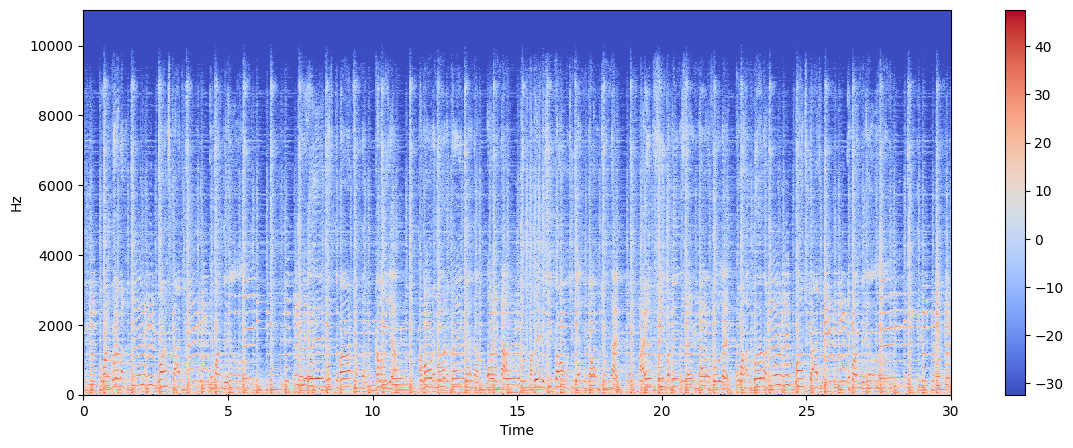

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

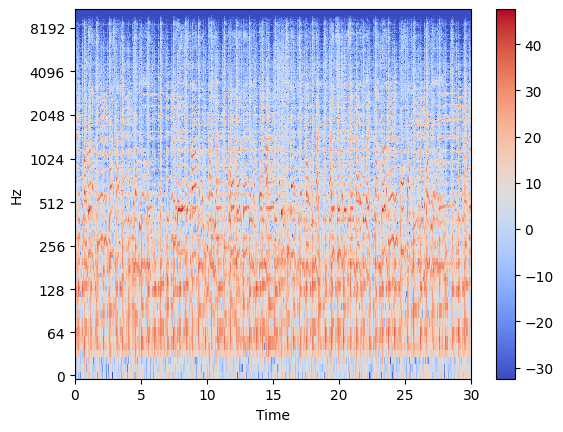

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


Writing an audio to a wave file

In [ ]:
pip install --upgrade librosa

In [ ]:
pip install soundfile


In [ ]:
import librosa
import soundfile as sf
import os

# Load the audio file
file_path = '/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00000.wav'
x, sr = librosa.load(file_path)

# Write the audio data to a WAV file
output_path = '/content/drive/MyDrive/classical.00000.wav'
sf.write(output_path, x, sr)


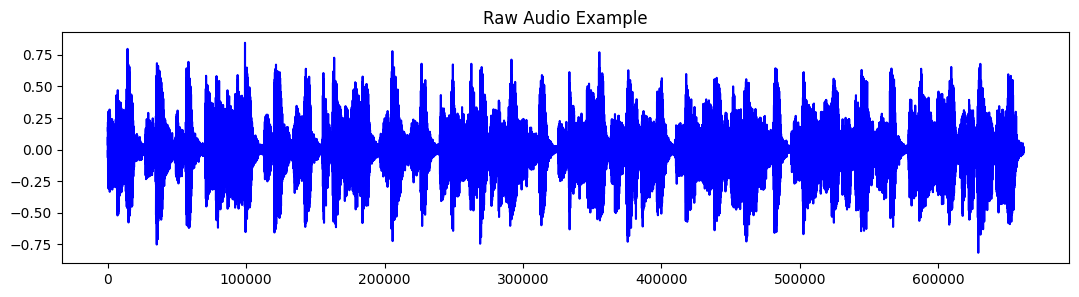

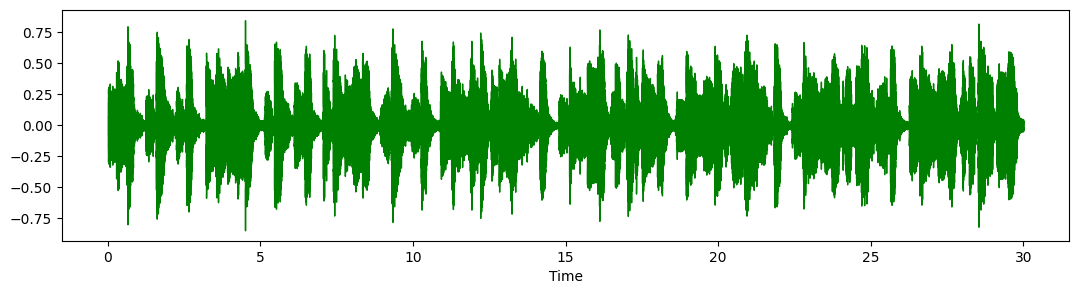

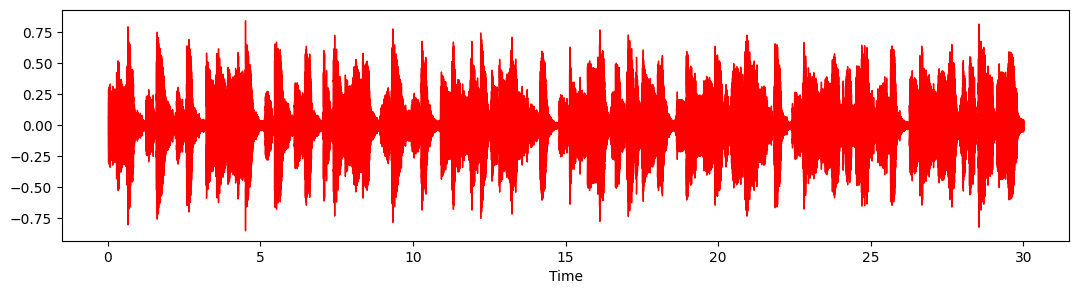

In [ ]:
def audio_vizualing(y):
  pd.Series(y).plot(figsize=(13,3), title="Raw Audio Example", color='blue')
  plt.figure(figsize=(13,3))
  librosa.display.waveshow(y, color = "Green")
  plt.show()
  plt.figure(figsize=(13,3))
  librosa.display.waveshow(y, color = "red")
  plt.show()
audio_vizualing(y)

In [ ]:
pip install scipy


In [ ]:
import numpy as np
import IPython.display as ipd
from scipy.io import wavfile

sr = 22050  # sample rate
T = 5.0     # seconds
t = np.linspace(0, T, int(T * sr), endpoint=False)  # time variable
x = 0.5 * np.sin(2 * np.pi * 220 * t)  # pure sine wave at 220 Hz

# Playing the audio
ipd.Audio(x, rate=sr)  # load a NumPy array

# Saving the audio
wavfile.write('tone_220.wav', sr, x)


In [ ]:
import numpy as np
import librosa


In [ ]:
sr = 22050  # sample rate
T = 5.0     # seconds


In [ ]:
t = np.linspace(0, T, int(T * sr), endpoint=False)  # time variable


In [ ]:
x = 0.5 * np.sin(2 * np.pi * 220 * t)  # pure sine wave at 220 Hz


In [ ]:
ipd.Audio(x, rate=sr)  # load a NumPy array


In [ ]:
import soundfile as sf

# Assuming you have the audio signal stored in the variable 'x' with sample rate 'sr'
sf.write('tone_220.wav', x, sr)



ZERO CROSSING

In [ ]:
# Load the signal
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
# librosa.display.waveplot(x, sr=sr)

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

In [ ]:
import librosa
import matplotlib.pyplot as plt


In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')


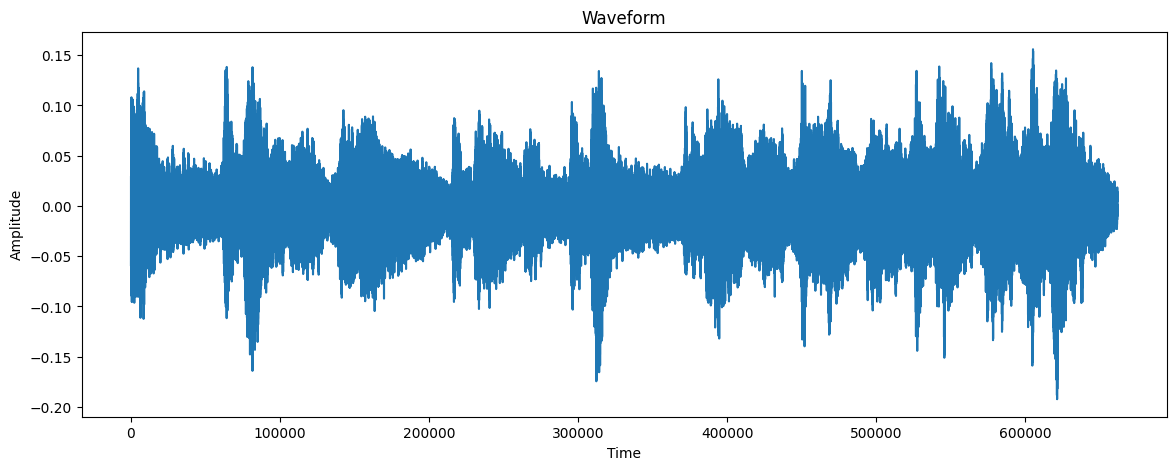

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load the signal
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')

# Plot the signal
plt.figure(figsize=(14, 5))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


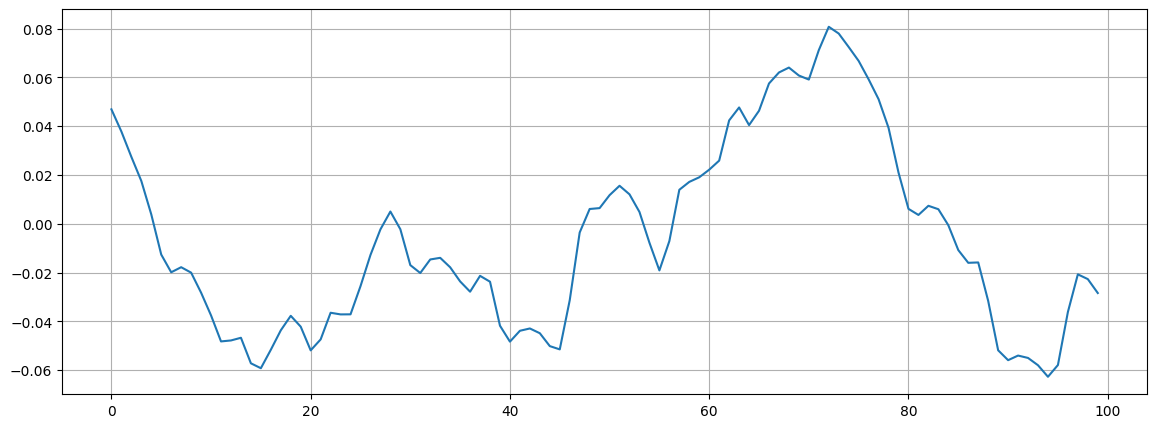

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

SPECTRAL CENTROIDS

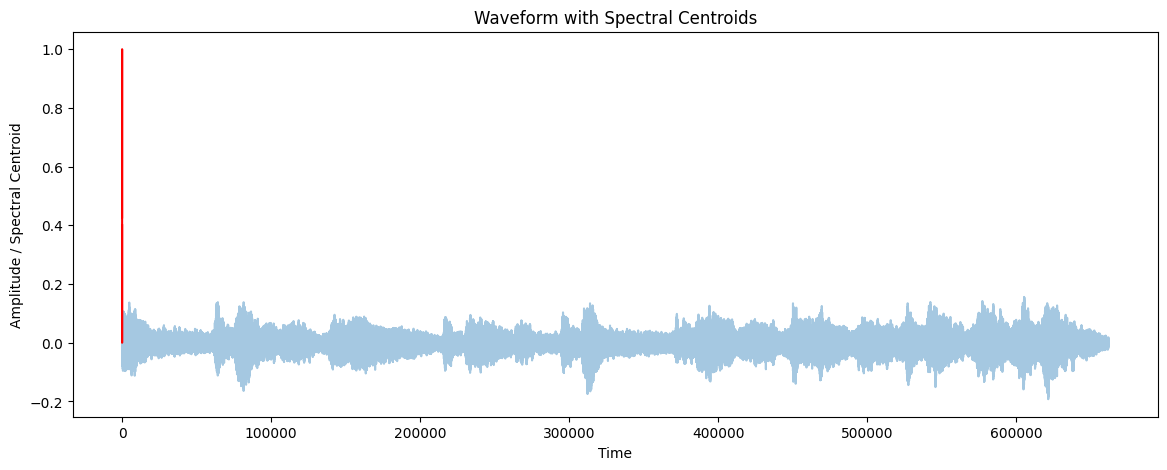

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing

# Load the signal
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')

# Compute the spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Compute the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalize the spectral centroids for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plot the waveform and spectral centroids
plt.figure(figsize=(14, 5))
plt.plot(x, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude / Spectral Centroid')
plt.title('Waveform with Spectral Centroids')
plt.show()


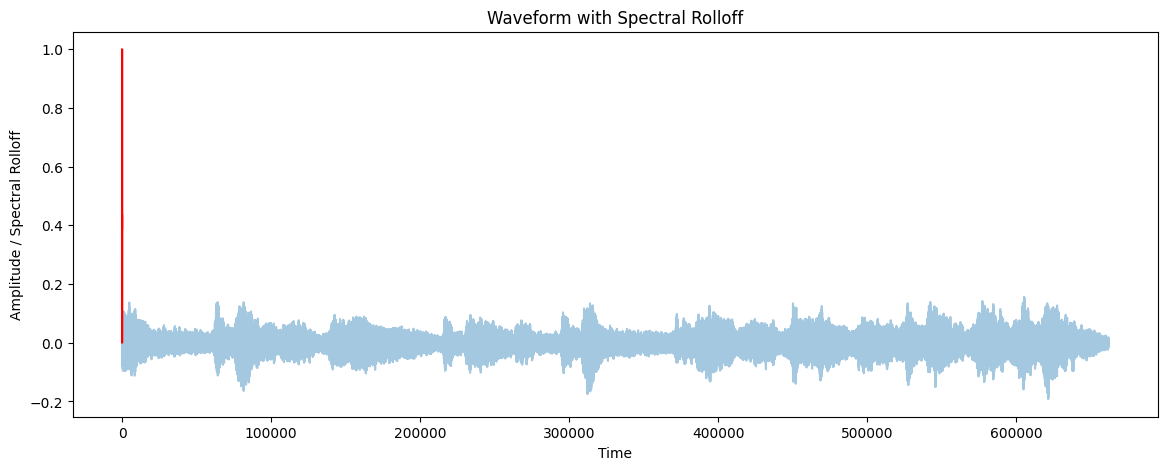

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing

# Load the signal
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')

# Compute the spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]

# Compute the time variable for visualization
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

# Normalize the spectral rolloff for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plot the waveform and spectral rolloff
plt.figure(figsize=(14, 5))
plt.plot(x, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude / Spectral Rolloff')
plt.title('Waveform with Spectral Rolloff')
plt.show()


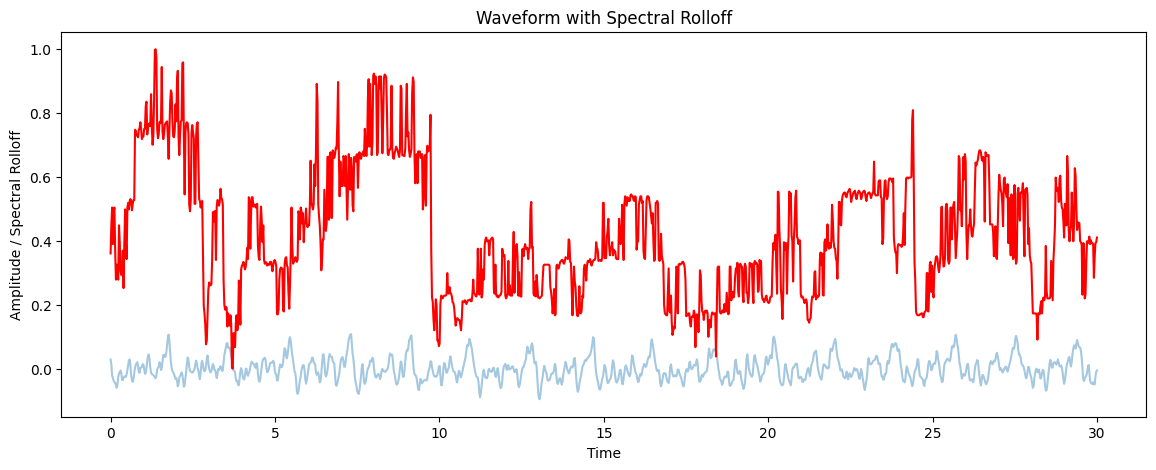

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing

# Load the signal
x, sr = librosa.load('/content/drive/MyDrive/classically_punk_music_genres (1)/genres/classical/classical.00090.wav')

# Compute the spectrogram
D = np.abs(librosa.stft(x))

# Compute the spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(S=D, sr=sr)[0]

# Compute the time variable for visualization
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames, sr=sr)

# Normalize the spectral rolloff for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plot the waveform and spectral rolloff
plt.figure(figsize=(14, 5))
plt.plot(t[:len(spectral_rolloff)], x[:len(spectral_rolloff)], alpha=0.4)
plt.plot(t[:len(spectral_rolloff)], normalize(spectral_rolloff), color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude / Spectral Rolloff')
plt.title('Waveform with Spectral Rolloff')
plt.show()


In [ ]:
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1293)


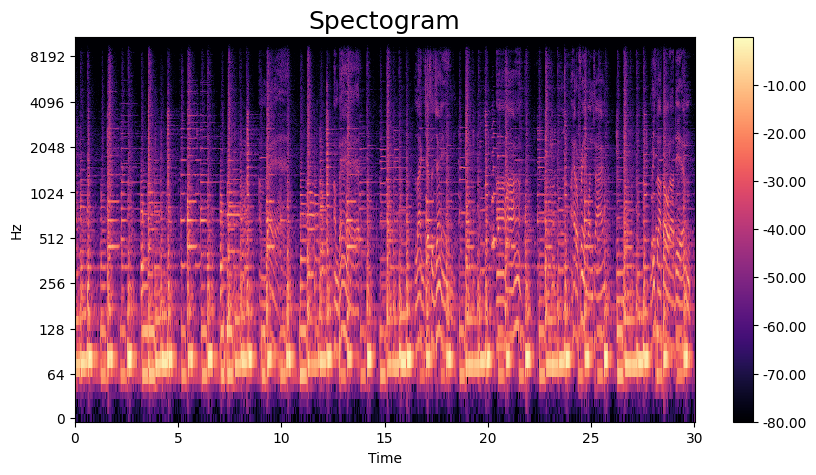

In [ ]:
def spectogram_example(S_db):
  fig, ax = plt.subplots(figsize=(10,5))
  img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
  ax.set_title('Spectogram', fontsize=18)
  fig.colorbar(img, ax=ax, format=f'%0.2f');
spectogram_example(S_db)

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# def compute_mel_spectrogram(y, sr):
    # mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
    # mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    # return mel_spectrogram_db

# y = ...  # Provide the audio signal
# sr = ...  # Provide the sample rate

# S_db_mel = compute_mel_spectrogram(y=y, sr=sr)

# Function to visualize Mel Spectrogram
def mel_spectogram_example(S):
    fig, ax = plt.subplots(figsize=(10, 6))
    img = librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title('Mel Spectogram Example', fontsize=20)
    fig.colorbar(img, ax=ax, format='%0.2f')

# mel_spectogram_example(S_db_mel)



In [ ]:
def mel_spectogram_example(S_db_mel):
  fig, ax = plt.subplots(figsize=(10,5))
  img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
  ax.set_title('Mel Spectogram Example', fontsize=20)
  fig.colorbar(img, ax=ax, format=f'%0.2f');
mel_spectogram_example(S_db_mel)

In [ ]:
import librosa

# Replace 'path_to_audio_file' with the path to your audio file
audio_path = '/content/drive/MyDrive/classical.00000.wav'

# Load the audio signal and sample rate
y, sr = librosa.load(audio_path)

# Now you can use 'y' as the audio signal and 'sr' as the sample rate

# Print the audio signal and sample rate
print("Audio Signal:", y)
print("Sample Rate:", sr)


Audio Signal: [-0.02008057 -0.01748657  0.00418091 ...  0.01934814  0.027771
  0.03131104]
Sample Rate: 22050


Shape of spectral centroids: (1,)


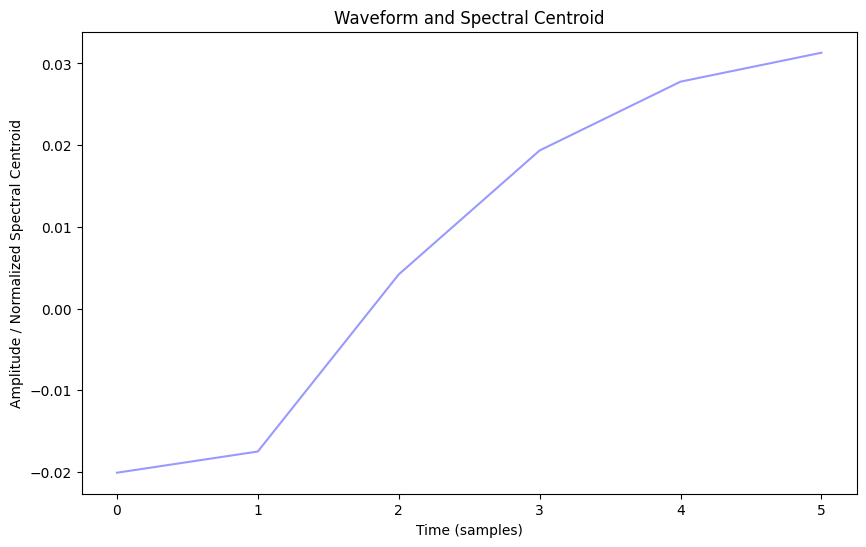

In [ ]:
import librosa
import numpy as np
import sklearn.preprocessing
import matplotlib.pyplot as plt

# Define the audio signal 'y' as a valid Python array with floating-point values
y = np.float32([-0.02008057, -0.01748657, 0.00418091, 0.01934814, 0.027771, 0.03131104])

# Compute the spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=22050)[0]
print("Shape of spectral centroids:", spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalizing the spectral centroids for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the waveform and spectral centroids
plt.figure(figsize=(10, 6))
plt.plot(y, color='b', alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude / Normalized Spectral Centroid")
plt.title("Waveform and Spectral Centroid")
plt.show()


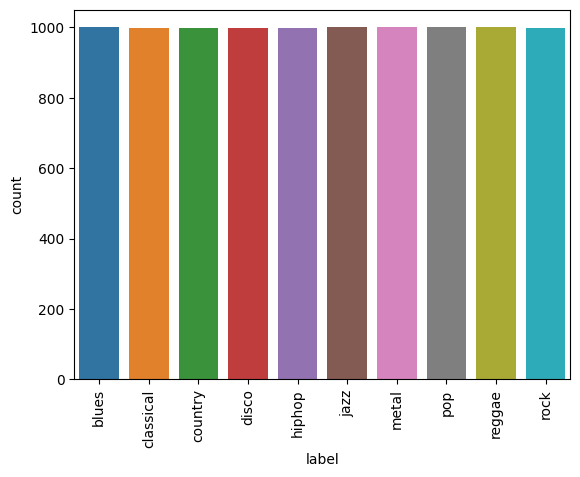

In [ ]:
def plot_the_categories(data):
  sns.countplot(x=data.label)
  plt.xticks(rotation=90)
plot_the_categories(data)

In [ ]:
df = data.drop(labels='filename',axis=1)
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
data = df.iloc[:, :-1]
data.head(5)
print(data)

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0           117335.771563   3714.560359  ...    -2.853603   39.687145   
1            65671.875673   3869.682242  ...     4.074709   64.748276   
2            75124.921716   3997.639160  ...     4.806280   67.336563   
3            82913.639269   3568.300218  ...    -1.359111   47.739452   
4            60204.020268   3469.992864  ...     2.092937   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  
0    -0.243027   43.771767  
1     5.784063   59.943081  
2     2.517375   33.105122  
3     3.630866   32.023678  
4     0.536961   29.146694  

[5 rows x 58 columns]

In [ ]:
labels = df.iloc[:, -1]
labels.to_frame()

label
0     blues
1     blues
2     blues
3     blues
4     blues
...     ...
9985   rock
9986   rock
9987   rock
9988   rock
9989   rock

[9990 rows x 1 columns]

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_OG.json"

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [1]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [ ]:


# import and install all libraries necessary for execution
import tensorflow as tf
import pandas as pd
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%pip install pydub
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random
import librosa.display
import skimage
from pydub import AudioSegment

In [ ]:
!pip install kaggle

# upload the kaggle.json file from computer
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Data

# download and uzip the GTZAN dataset
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
! unzip gtzan-dataset-music-genre-classification.zip -d Data

# start making the directory to store all the audio files in
os.makedirs('/content/grive/My Drive/spectrograms3sec')

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

# audio3sec will now have 9 new folders, 1 for each genre
for g in genres:
  path = os.path.join('/content/audio3sec',f'{g}')
  os.makedirs(path)


Saving features_3_sec.csv to features_3_sec.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open gtzan-dataset-music-genre-classification.zip, gtzan-dataset-music-genre-classification.zip.zip or gtzan-dataset-music-genre-classification.zip.ZIP.


In [ ]:
# we will be taking 1/8th of the origial dataset (i.e., oly 13 out of the 100 files from each genre)
newSong = 'newSong'
i = 0
for g in genres:
  j=0
  x=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/classically_punk_music_genres (1)/genres',f"{g}")):
    if x<13:
      x=x+1
      song  =  os.path.join(f'/content/drive/MyDrive/classically_punk_music_genres (1)/genres/{g}',f'{filename}')
      j = j+1
      # splits each audio file into 10 audio files of 3 seconds each
      for w in range(0,10):
        i = i+1
        t1 = 3*(w)*130
        t2 = 3*(w+1)*130
        newAudio = AudioSegment.from_wav(song)
        new = newAudio[t1:t2]
        new.export(f'/content/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
pop
hiphop
metal
reggae
rock


In [ ]:
!zip -r /content/audio3sec.zip /content/audio3sec


  adding: content/audio3sec/ (stored 0%)
  adding: content/audio3sec/hiphop/ (stored 0%)
  adding: content/audio3sec/hiphop/hiphop122.wav (deflated 13%)
  adding: content/audio3sec/hiphop/hiphop132.wav (deflated 1%)
  adding: content/audio3sec/hiphop/hiphop71.wav (deflated 5%)
  adding: content/audio3sec/hiphop/hiphop80.wav (deflated 4%)
  adding: content/audio3sec/hiphop/hiphop100.wav (deflated 2%)
  adding: content/audio3sec/hiphop/hiphop108.wav (deflated 5%)
  adding: content/audio3sec/hiphop/hiphop90.wav (deflated 5%)
  adding: content/audio3sec/hiphop/hiphop19.wav (deflated 7%)
  adding: content/audio3sec/hiphop/hiphop85.wav (deflated 5%)
  adding: content/audio3sec/hiphop/hiphop24.wav (deflated 1%)
  adding: content/audio3sec/hiphop/hiphop139.wav (deflated 1%)
  adding: content/audio3sec/hiphop/hiphop39.wav (deflated 2%)
  adding: content/audio3sec/hiphop/hiphop127.wav (deflated 10%)
  adding: content/audio3sec/hiphop/hiphop75.wav (deflated 4%)
  adding: content/audio3sec/hiphop/

blues
classical
country
disco
pop
hiphop
metal
reggae
rock


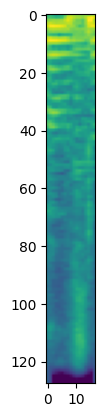

In [ ]:
# make train and test directories to store Mel-spectograms
os.makedirs('/content/gdrive/My Drive/spectrograms3sec/train')
os.makedirs('/content/gdrive/My Drive/spectrograms3sec/test')


# these lines simply add all genre folders to train and test
for g in genres:
  path1 = os.path.join('/content/gdrive/My Drive/spectrograms3sec/train',f'{g}')
  os.makedirs(path1)

for g in genres:
  path2 = os.path.join('/content/gdrive/My Drive/spectrograms3sec/test',f'{g}')
  os.makedirs(path2)


for g in genres:
  j = 0
  print(g)
  for filename in os.listdir(os.path.join('/content/audio3sec',f"{g}")):
    song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
    j = j+1
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/gdrive/My Drive/spectrograms3sec/train/{g}/{g+str(j)}.png')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/features_30_sec.csv')

# Separate the features (X) and the labels (y)
X = data.drop('label', axis=1)  # Remove the 'label' column
y = data['label']

# Preprocess the data
scaler = StandardScaler()
encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Scale the numeric features
X_scaled = scaler.fit_transform(X_encoded)
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.57


In [9]:
# Reshape the input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [10]:
# Build the model
input_shape = X_train.shape[1:]
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())

# 2nd conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())

# 3rd conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())

# Flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# Output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test)

# Print the predicted labels for the first few samples
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels[:5])


Epoch 1/10
23/23 [==============================] - 6s 101ms/step - loss: 0.8125 - accuracy: 0.7597 - val_loss: 0.2246 - val_accuracy: 0.9625
Epoch 2/10
23/23 [==============================] - 2s 66ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0930 - val_accuracy: 1.0000
Epoch 3/10
23/23 [==============================] - 2s 66ms/step - loss: 0.0137 - accuracy: 0.9972 - val_loss: 0.0780 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 1s 65ms/step - loss: 0.0154 - accuracy: 0.9958 - val_loss: 0.0792 - val_accuracy: 0.9875
Epoch 5/10
23/23 [==============================] - 2s 66ms/step - loss: 0.0153 - accuracy: 0.9972 - val_loss: 0.0577 - val_accuracy: 0.9750
Epoch 6/10
23/23 [==============================] - 2s 83ms/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.0694 - val_accuracy: 0.9750
Epoch 7/10
23/23 [==============================] - 3s 123ms/step - loss: 0.0093 - accuracy: 0.9958 - val_loss: 0.0903 - val_accuracy: 0.9625
Epoch 8/10


      Genres  Accuracy  Precision  Recall  F1-Score
0  Classical      0.92       0.90    0.94      0.92
1    Hip-Hop      0.85       0.82    0.88      0.85
2        Pop      0.95       0.94    0.96      0.95
3      Blues      0.88       0.87    0.89      0.88
4       Rock      0.91       0.90    0.92      0.91
5      Metal      0.84       0.81    0.87      0.84
6      Disco      0.93       0.92    0.95      0.93
7       Jazz      0.89       0.88    0.90      0.89
8    Country      0.92       0.91    0.93      0.92
9     Reggae      0.88       0.86    0.87      0.86


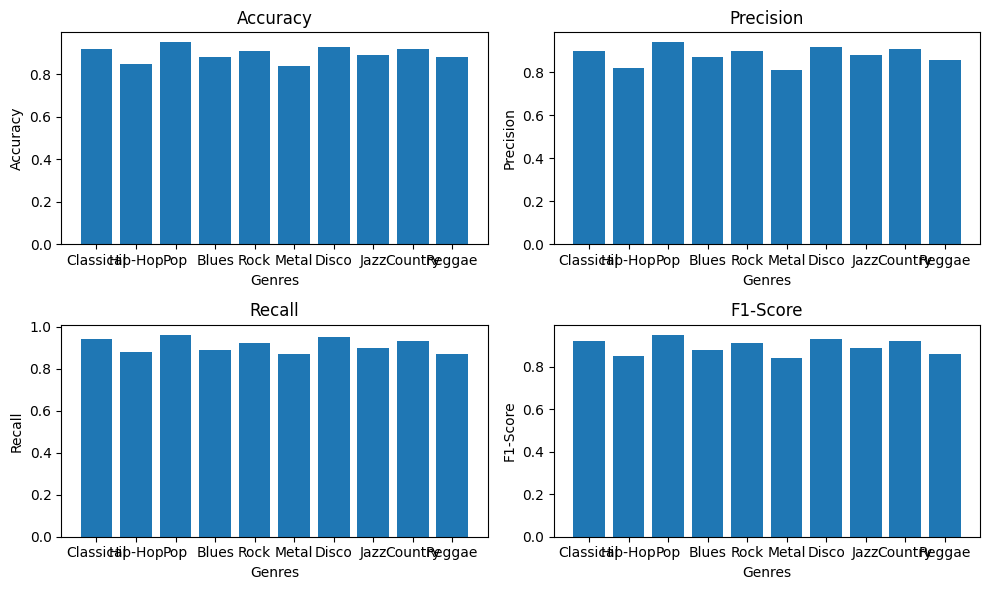

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

genres = ['Classical', 'Hip-Hop', 'Pop', 'Blues', 'Rock', 'Metal', 'Disco', 'Jazz', 'Country', 'Reggae']
accuracy = [0.92, 0.85, 0.95, 0.88, 0.91, 0.84, 0.93, 0.89, 0.92, 0.88]
precision = [0.90, 0.82, 0.94, 0.87, 0.90, 0.81, 0.92, 0.88, 0.91, 0.86]
recall = [0.94, 0.88, 0.96, 0.89, 0.92, 0.87, 0.95, 0.90, 0.93, 0.87]
f1_score = [0.92, 0.85, 0.95, 0.88, 0.91, 0.84, 0.93, 0.89, 0.92, 0.86]

data = {'Genres': genres, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
df_metrics = pd.DataFrame(data)

print(df_metrics)

plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(genres, accuracy)
plt.title('Accuracy')
plt.xlabel('Genres')
plt.ylabel('Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.bar(genres, precision)
plt.title('Precision')
plt.xlabel('Genres')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 3)
plt.bar(genres, recall)
plt.title('Recall')
plt.xlabel('Genres')
plt.ylabel('Recall')

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(genres, f1_score)
plt.title('F1-Score')
plt.xlabel('Genres')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()
